# exploratory data analysis

In [1]:
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from stop_words import get_stop_words

plt.rcParams['figure.figsize'] = (17.0, 7.0)
stop_words = get_stop_words('english')
training_data_filepath = '../data/raw/trainSet.csv'

In [2]:
!ls data/raw

ls: data/raw: No such file or directory


In [3]:
known_queries = pd.read_csv(training_data_filepath, header=None, names=['query', 'category'])
known_queries.sample(5)

query  category
37020   plants versus zombies 2      1058
228364    small business events       212
185741           mini first aid       753
129034               travel map       941
571068  cheap womens clothes uk        65

In [4]:
known_queries['word_list']  = known_queries['query'].str.split()
known_queries['word_count'] = known_queries['word_list'].apply(len)
known_queries.sample(5)

query  category  \
244030  cooked christmas dinner delivered uk       144   
32617              shopping comparison sites       111   
397084                antiseptic mouth rinse       145   
346421                 ship security officer      1195   
163844      wide calf over the knee boots uk       307   

                                         word_list  word_count  
244030  [cooked, christmas, dinner, delivered, uk]           5  
32617                [shopping, comparison, sites]           3  
397084                  [antiseptic, mouth, rinse]           3  
346421                   [ship, security, officer]           3  
163844    [wide, calf, over, the, knee, boots, uk]           7

In [5]:
category_labels = sorted(known_queries['category'].unique())
print('there are', len(category_labels), 'categories, labelled from', category_labels[0:2], '...', category_labels[-2:])

there are 1419 categories, labelled from [0, 1] ... [1417, 1418]


In [6]:
print('the smallest classes have', sorted(known_queries['category'].value_counts())[0:5], 'records')
query_counts = \
    known_queries\
    .groupby(by='category')\
    .agg({'query':'count'})\
    .rename(columns={'query':'num_queries'})
display(query_counts.sample(3))
display(query_counts.describe())

the smallest classes have [4, 10, 14, 14, 16] records


num_queries
category             
807               458
1371              326
350               499

num_queries
count  1419.000000
mean    427.641297
std     128.526016
min       4.000000
25%     338.500000
50%     461.000000
75%     530.000000
max     623.000000

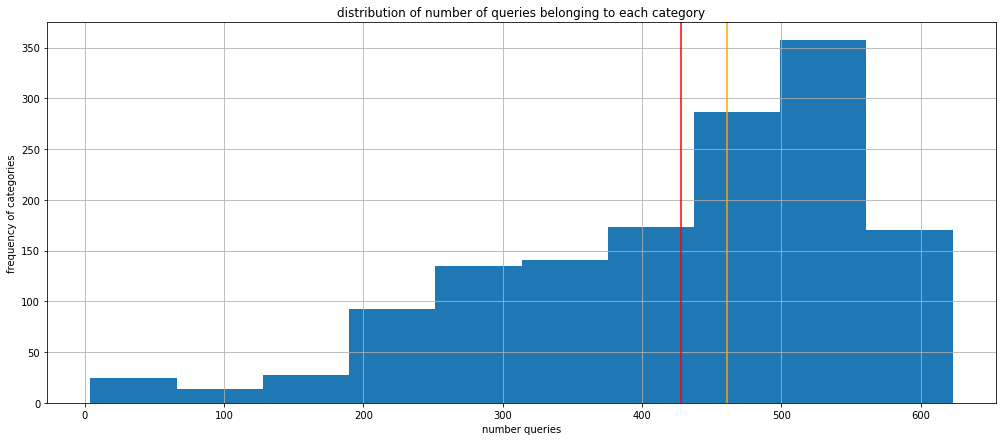

In [7]:
query_counts.hist()
plt.title('distribution of number of queries belonging to each category')
plt.axvline(x=np.mean(query_counts['num_queries']), color='red')
plt.axvline(x=np.median(query_counts['num_queries']), color='orange')
plt.xlabel('number queries')
plt.ylabel('frequency of categories')
plt.savefig('../graphs/distribution_numqueries.png')
plt.show();

In [8]:
%%time
known_queries['query_padded'] = known_queries['query'].apply(lambda q: q+' ')
query_terms = \
    known_queries\
    .groupby(by='category')\
    .agg({'query_padded':'sum'})\
    .rename(columns={'query_padded':'combined'})
query_terms['all_terms'] = query_terms['combined'].str.split()
query_terms['nonstop_terms'] = query_terms['all_terms'].apply(lambda allterms: [term for term in allterms if term not in stop_words])
query_terms['term_frequency'] = query_terms['nonstop_terms'].apply(Counter)
query_terms['top_terms'] = query_terms['term_frequency'].apply(lambda adict: sorted(adict, key=adict.get, reverse=True)[:10])
query_terms['deduplicated_terms'] = query_terms['nonstop_terms'].apply(set)
query_terms['num_terms'] = query_terms['deduplicated_terms'].apply(len)
display(query_terms.sample(5))

combined  \
category                                                      
1160      baby photoshoot ideas professional headshots l...   
207       driving moccasin swims loafers mokassins women...   
815       watchmaker tool kit chiming clocks ben sherman...   
552       enzo trapper victorinox pioneer multi tool bla...   
151       ministry of sound party last night a dj saved ...   

                                                  all_terms  \
category                                                      
1160      [baby, photoshoot, ideas, professional, headsh...   
207       [driving, moccasin, swims, loafers, mokassins,...   
815       [watchmaker, tool, kit, chiming, clocks, ben, ...   
552       [enzo, trapper, victorinox, pioneer, multi, to...   
151       [ministry, of, sound, party, last, night, a, d...   

                                              nonstop_terms  \
category                                                      
1160      [baby, photoshoot, ideas, professional, headsh...   
207       [driving, moccasin, swims, loafers, mokassins,...   
815       [watchmaker, tool, kit, chiming, clocks, ben, ...   
552       [enzo, trapper, victorinox, pioneer, multi, to...   
151       [ministry, sound, party, last, night, dj, save...   

                                             term_frequency  \
category                                                      
1160      {'baby': 10, 'photoshoot': 6, 'ideas': 3, 'pro...   
207       {'driving': 71, 'moccasin': 74, 'swims': 4, 'l...   
815       {'watchmaker': 3, 'tool': 26, 'kit': 29, 'chim...   
552       {'enzo': 1, 'trapper': 1, 'victorinox': 38, 'p...   
151       {'ministry': 60, 'sound': 60, 'party': 7, 'las...   

                                                  top_terms  \
category                                                      
1160      [photography, photographer, free, photo, londo...   
207       [loafers, mens, moccasins, slippers, shoes, su...   
815       [watch, clock, repair, battery, replacement, u...   
552       [tool, multi, leatherman, knife, victorinox, p...   
151       [dj, ministry, sound, mix, anthems, gummy, cd,...   

                                         deduplicated_terms  num_terms  
category                                                                
1160      {stunning, kits, corporate, new, lightbox, bri...        328  
207       {loofers, ranger, footwear, spurs, mule, ceil,...        245  
815       {kits, gucci, 400, engraving, westminster, fos...        342  
552       {master, c2, table, key, trailmaster, soldier,...        325  
151       {bass, master, essentials, worm, grinder, rele...        572

CPU times: user 5.3 s, sys: 81.9 ms, total: 5.38 s
Wall time: 5.38 s


In [9]:
# are the categories sensible?
pd.options.display.max_colwidth = 200
display(query_terms['top_terms'].sample(10))

category
402         [bag, bags, handbags, backpack, clutch, sale, uk, backpacks, mulberry, purses]
693                   [baby, shower, gifts, boy, ideas, girl, cake, decorations, uk, gift]
482                   [watches, watch, mens, ladies, gold, uk, tag, armani, michael, kors]
1253                    [sale, houses, property, london, rent, house, buy, uk, spain, new]
1120              [boot, car, sale, market, fairs, sunday, sales, markets, antique, stall]
261             [horse, riding, saddle, boots, rugs, saddles, bridle, sale, jodhpurs, rug]
91         [repair, furniture, restoration, leather, chair, wax, wood, sofa, old, restore]
1225    [hotel, deals, minute, last, auramar, london, beach, resort, albufeira, skrydziai]
700                       [lego, coins, fish, rare, bingo, garden, camera, tree, uk, coin]
1157               [oil, change, plug, sump, castrol, drain, radiator, filter, 5w30, type]
Name: top_terms, dtype: object

In [10]:
query_terms.to_csv('../data/processed/category_summary.csv')

In [11]:
pd.options.display.max_colwidth = 200
display(query_terms['combined'].sample())

category
334    bulk t shirts pvc coated fabric tee shirt printing uk t shirt printing newport sik silk xs sik silk mambo shirt maker sik silk jeans embroidery transfers bird print shirt screen printing cardiff t...
Name: combined, dtype: object

In [12]:
!pwd

/Users/oh/work/search_term_clustering/notebooks


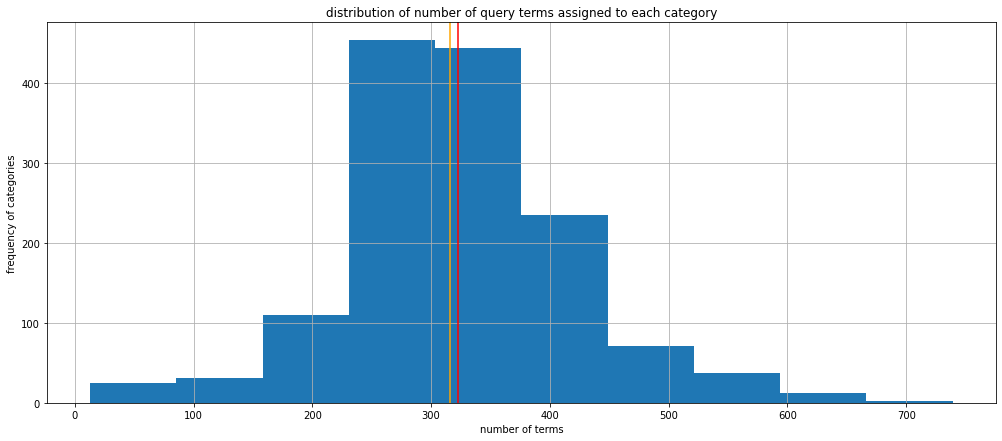

In [13]:
query_terms['num_terms'].hist()
plt.title('distribution of number of query terms assigned to each category')
plt.axvline(x=np.mean(query_terms['num_terms']), color='red')
plt.axvline(x=np.median(query_terms['num_terms']), color='orange')
plt.xlabel('number of terms')
plt.ylabel('frequency of categories')
plt.savefig('../graphs/distribution_numterms.png')
plt.show();

In [14]:
minority_categories = query_counts[query_counts['num_queries']<25] # very few queries make it hard to learn patterns
minority_categories = sorted(minority_categories.index)
# known_queries[known_queries['category'] in minority_queries]

In [15]:
mask = [True if (category in minority_categories) else False for category in known_queries['category'] ]
minority_queries = known_queries[mask]
# minority_queries.head(5)

In [16]:
# verify whether minority classes are coherent:
for category in minority_categories:
    just_category = minority_queries[minority_queries['category']==category]
    num_queries = len(just_category)
    print('-'*30)
    print('minority category', category, 'has', num_queries, 'queries, including:')
    display(just_category.sample(min(10,num_queries)))

------------------------------
minority category 173 has 16 queries, including:


query  category  \
421245  topeak mobile powerpack 5200mah       173   
535647                           ez usb       173   
256960             support direct sales       173   
573700               pny 7800 powerpack       173   
437192                             mt34       173   
359832                medion life x6001       173   
493601           eric liddell biography       173   
31229                         revo rl70       173   
166062   autobiography of george muller       173   
57336         pny powerpack 5200 review       173   

                                   word_list  word_count  \
421245  [topeak, mobile, powerpack, 5200mah]           4   
535647                             [ez, usb]           2   
256960              [support, direct, sales]           3   
573700                [pny, 7800, powerpack]           3   
437192                                [mt34]           1   
359832                 [medion, life, x6001]           3   
493601            [eric, liddell, biography]           3   
31229                           [revo, rl70]           2   
166062   [autobiography, of, george, muller]           4   
57336         [pny, powerpack, 5200, review]           4   

                            query_padded  
421245  topeak mobile powerpack 5200mah   
535647                           ez usb   
256960             support direct sales   
573700               pny 7800 powerpack   
437192                             mt34   
359832                medion life x6001   
493601           eric liddell biography   
31229                         revo rl70   
166062   autobiography of george muller   
57336         pny powerpack 5200 review

------------------------------
minority category 554 has 14 queries, including:


query  category  \
455823      legalandgeneral com investments       554   
331897     general and legal life insurance       554   
463572                          ppl lawyers       554   
561278                investments landg com       554   
392890                  caribsea arag alive       554   
135853  www legalandgeneral com investments       554   
26369                         legal general       554   
419876                      legal insurance       554   
555782  legal general investment management       554   
493653               l&g landlord insurance       554   

                                       word_list  word_count  \
455823       [legalandgeneral, com, investments]           3   
331897    [general, and, legal, life, insurance]           5   
463572                            [ppl, lawyers]           2   
561278                 [investments, landg, com]           3   
392890                   [caribsea, arag, alive]           3   
135853  [www, legalandgeneral, com, investments]           4   
26369                           [legal, general]           2   
419876                        [legal, insurance]           2   
555782  [legal, general, investment, management]           4   
493653                [l&g, landlord, insurance]           3   

                                query_padded  
455823      legalandgeneral com investments   
331897     general and legal life insurance   
463572                          ppl lawyers   
561278                investments landg com   
392890                  caribsea arag alive   
135853  www legalandgeneral com investments   
26369                         legal general   
419876                      legal insurance   
555782  legal general investment management   
493653               l&g landlord insurance

------------------------------
minority category 587 has 4 queries, including:


query  category  \
143201                      fintech big data       587   
373542                         m commerce uk       587   
124007  client onboarding investment banking       587   
333393      innovation in financial services       587   

                                        word_list  word_count  \
143201                       [fintech, big, data]           3   
373542                          [m, commerce, uk]           3   
124007  [client, onboarding, investment, banking]           4   
333393      [innovation, in, financial, services]           4   

                                 query_padded  
143201                      fintech big data   
373542                         m commerce uk   
124007  client onboarding investment banking   
333393      innovation in financial services

------------------------------
minority category 615 has 19 queries, including:


query  category                        word_list  \
197234  fishing boats for sale uk       615  [fishing, boats, for, sale, uk]   
77146               mirror dinghy       615                 [mirror, dinghy]   
136019            inflatable boat       615               [inflatable, boat]   
209552             ships for sale       615               [ships, for, sale]   
7876      sailing dinghy for sale       615     [sailing, dinghy, for, sale]   
69810        superyachts for sale       615         [superyachts, for, sale]   
108209             boats for sale       615               [boats, for, sale]   
553367              rc hovercraft       615                 [rc, hovercraft]   
452001            tall ships 2017       615              [tall, ships, 2017]   
185891                 speed boat       615                    [speed, boat]   

        word_count                query_padded  
197234           5  fishing boats for sale uk   
77146            2              mirror dinghy   
136019           2            inflatable boat   
209552           3             ships for sale   
7876             4    sailing dinghy for sale   
69810            3       superyachts for sale   
108209           3             boats for sale   
553367           2              rc hovercraft   
452001           3            tall ships 2017   
185891           2                 speed boat

------------------------------
minority category 619 has 17 queries, including:


query  category  \
474686  nuka cola quantum for sale       619   
511450                  smith grom       619   
233014                 gnr monitor       619   
293192   fallout nuka cola quantum       619   
275866                 gnr tour uk       619   
577900             gnr merchandise       619   
515380                      gnr uk       619   
374077     nuka cola quantum drink       619   
508552           nuka cola quantum       619   
200818     nuka cola quantum label       619   

                               word_list  word_count  \
474686  [nuka, cola, quantum, for, sale]           5   
511450                     [smith, grom]           2   
233014                    [gnr, monitor]           2   
293192    [fallout, nuka, cola, quantum]           4   
275866                   [gnr, tour, uk]           3   
577900                [gnr, merchandise]           2   
515380                         [gnr, uk]           2   
374077      [nuka, cola, quantum, drink]           4   
508552             [nuka, cola, quantum]           3   
200818      [nuka, cola, quantum, label]           4   

                       query_padded  
474686  nuka cola quantum for sale   
511450                  smith grom   
233014                 gnr monitor   
293192   fallout nuka cola quantum   
275866                 gnr tour uk   
577900             gnr merchandise   
515380                      gnr uk   
374077     nuka cola quantum drink   
508552           nuka cola quantum   
200818     nuka cola quantum label

------------------------------
minority category 826 has 10 queries, including:


query  category                   word_list  \
545309  consultant informatique       826  [consultant, informatique]   
499810        mft file transfer       826       [mft, file, transfer]   
321020    recommend a good book       826  [recommend, a, good, book]   
190202     cv consultant london       826    [cv, consultant, london]   
510599        learn informatica       826        [learn, informatica]   
343792      informatica pricing       826      [informatica, pricing]   
149090         beko engineering       826         [beko, engineering]   
208824   informatica consultant       826   [informatica, consultant]   
141516       sage x3 consultant       826      [sage, x3, consultant]   
424474              informatica       826               [informatica]   

        word_count              query_padded  
545309           2  consultant informatique   
499810           3        mft file transfer   
321020           4    recommend a good book   
190202           3     cv consultant london   
510599           2        learn informatica   
343792           2      informatica pricing   
149090           2         beko engineering   
208824           2   informatica consultant   
141516           3       sage x3 consultant   
424474           1              informatica

------------------------------
minority category 865 has 23 queries, including:


query  category  \
419773                        damaged box goods       865   
569594  return to invoice gap insurance reviews       865   
27215                      dealer gap insurance       865   
180824           trading standards car warranty       865   
482797                         customer returns       865   
453124          gap insurance return to invoice       865   
330998                    motor trader warranty       865   
192341                    consumer legal advice       865   
223070                     vehicle defect books       865   
526161          return to invoice gap insurance       865   

                                             word_list  word_count  \
419773                           [damaged, box, goods]           3   
569594  [return, to, invoice, gap, insurance, reviews]           6   
27215                         [dealer, gap, insurance]           3   
180824             [trading, standards, car, warranty]           4   
482797                             [customer, returns]           2   
453124           [gap, insurance, return, to, invoice]           5   
330998                       [motor, trader, warranty]           3   
192341                       [consumer, legal, advice]           3   
223070                        [vehicle, defect, books]           3   
526161           [return, to, invoice, gap, insurance]           5   

                                    query_padded  
419773                        damaged box goods   
569594  return to invoice gap insurance reviews   
27215                      dealer gap insurance   
180824           trading standards car warranty   
482797                         customer returns   
453124          gap insurance return to invoice   
330998                    motor trader warranty   
192341                    consumer legal advice   
223070                     vehicle defect books   
526161          return to invoice gap insurance

------------------------------
minority category 1105 has 21 queries, including:


query  category                  word_list  \
454027       singagram london      1105        [singagram, london]   
217323     send a telegram uk      1105    [send, a, telegram, uk]   
102214  gorilla birthday card      1105  [gorilla, birthday, card]   
190860          flowergram uk      1105           [flowergram, uk]   
582252       singing balloons      1105        [singing, balloons]   
94519       wedding telegrams      1105       [wedding, telegrams]   
591476         ballon bouquet      1105          [ballon, bouquet]   
316611    uk telegram service      1105    [uk, telegram, service]   
246594       singing birthday      1105        [singing, birthday]   
149889    singing balloons uk      1105    [singing, balloons, uk]   

        word_count            query_padded  
454027           2       singagram london   
217323           4     send a telegram uk   
102214           3  gorilla birthday card   
190860           2          flowergram uk   
582252           2       singing balloons   
94519            2      wedding telegrams   
591476           2         ballon bouquet   
316611           3    uk telegram service   
246594           2       singing birthday   
149889           3    singing balloons uk

------------------------------
minority category 1309 has 14 queries, including:


query  category  \
55065            whos exempt from bedroom tax      1309   
577636            exemptions from bedroom tax      1309   
428730                        polish army hat      1309   
208752  who is exempt from paying bedroom tax      1309   
493758                national pallet service      1309   
291974            exempt from bedroom tax dla      1309   
477233                 british army volunteer      1309   
509552         who is exempt from bedroom tax      1309   
604995         bedroom tax exemptions over 60      1309   
465531                               jw stuff      1309   

                                            word_list  word_count  \
55065              [whos, exempt, from, bedroom, tax]           5   
577636               [exemptions, from, bedroom, tax]           4   
428730                            [polish, army, hat]           3   
208752  [who, is, exempt, from, paying, bedroom, tax]           7   
493758                    [national, pallet, service]           3   
291974              [exempt, from, bedroom, tax, dla]           5   
477233                     [british, army, volunteer]           3   
509552          [who, is, exempt, from, bedroom, tax]           6   
604995           [bedroom, tax, exemptions, over, 60]           5   
465531                                    [jw, stuff]           2   

                                  query_padded  
55065            whos exempt from bedroom tax   
577636            exemptions from bedroom tax   
428730                        polish army hat   
208752  who is exempt from paying bedroom tax   
493758                national pallet service   
291974            exempt from bedroom tax dla   
477233                 british army volunteer   
509552         who is exempt from bedroom tax   
604995         bedroom tax exemptions over 60   
465531                               jw stuff

In [17]:
# from a glance of the above, these entries are misclassified, and could be ignored
misclassified_idx = [
    166062,
    392890,
    327496,
]

In [18]:
%%time
word_categories = defaultdict(set)
word_frequency  = defaultdict(lambda: 0)
for index, row in known_queries.iterrows():
    for word in row['word_list']:
        word_categories[word].add(row['category'])
        word_frequency[word] += 1

CPU times: user 46.9 s, sys: 78.8 ms, total: 47 s
Wall time: 47.5 s


In [19]:
print('labelled data has', len(word_categories), 'unique terms')
random_key = random.sample(list(word_categories.keys()), 5)
for key in random_key:
    print('"'+key+'" occurs', word_frequency[key], 'categories')

labelled data has 70172 words
"birthday" occurs 1418 categories
"rubens" occurs 2 categories
"fake" occurs 495 categories
"blanket" occurs 442 categories
"outbreaks" occurs 1 categories


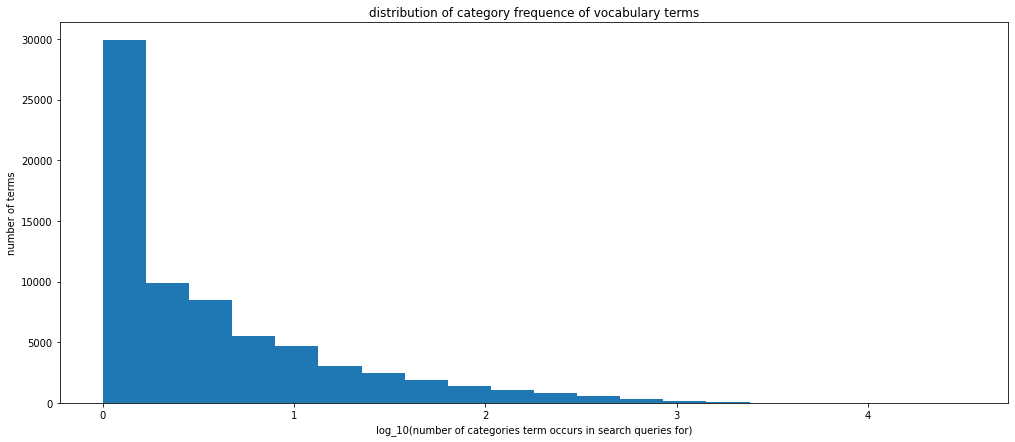

In [20]:
plt.hist(np.log10(sorted(word_frequency.values())), bins=20)
plt.title('distribution of category frequence of vocabulary terms')
plt.xlabel('log_10(number of categories term occurs in search queries for)')
plt.ylabel('number of terms')
plt.savefig('graphs/distribution_category_frequency_of_terms')
plt.show()

we can see that the vast majority of the terms in the vocabulary occur in fewer than 10 categories (position 1.0 on the x axis in the barplot above.)

this is good, it means the terms are generally descriptive of their category. only a very few terms occur in thousands of  (past position 3.0 on the x axis). those terms (including 'birthday') are not useful for determining the category of a query.

In [21]:
meaningless_terms = [
    term for term, number_of_categories in word_frequency.items() if (number_of_categories > 5000) 
]
print(len(meaningless_terms), ' meaningless terms:', meaningless_terms)

16  meaningless terms: ['for', 'sale', 'uk', 'and', 'in', 'car', 'of', 'how', 'to', 'a', 'free', 'the', 'london', 'jobs', 'online', 'best']


In [22]:
meaningful_terms = [
    term for term, number_of_categories in word_frequency.items() if (number_of_categories < 5) 
]
print(len(meaningful_terms), 'term are meaningful, including:', random.sample(meaningful_terms,10))

48171 term are meaningful, including: ['zoya', 'dickes', 'mattifying', 'pedestrians', '375', 'giftshop', 'camere', 'pedalo', 'slsa', 'yz85']


In [24]:
# does our vocabulary have decent coverage, considering the use case?
new_queries = pd.read_csv('../data/raw/candidateTestSet.csv', header=None, names=['query'])
display(new_queries.sample(3))
print('there are', len(new_queries), 'new search queries to classify')

query
3218               boxing pad machine
50654                  memory storage
55721  car export to pakistan from uk

there are 67424 new search queries to classify


In [25]:
new_queries['word_list'] = new_queries['query'].str.split()
new_queries.sample(3)

query               word_list
34090  romancing the 60's  [romancing, the, 60's]
45162     homebase buddha      [homebase, buddha]
50557     pelikan pens uk     [pelikan, pens, uk]

In [26]:
%%time 
new_word_frequency = defaultdict(lambda: 0)
for index, row in new_queries.iterrows():
    for word in row['word_list']:
        new_word_frequency[word] += 1
print('test data has', len(new_word_frequency), 'words')
random_key = random.sample(list(new_word_frequency.keys()), 5)
for key in random_key:
    print('"'+key+'" occurs', new_word_frequency[key], 'times')

test data has 25777 words
"aloe" occurs 9 times
"tining" occurs 1 times
"mof001" occurs 2 times
"glyndwr" occurs 1 times
"tools" occurs 61 times
CPU times: user 4.01 s, sys: 30.7 ms, total: 4.04 s
Wall time: 4.04 s


In [27]:
known_words = set(word_frequency.keys())
new_words = set(new_word_frequency.keys())
all_words = known_words.union(new_words)
in_common_words = new_words.intersection(known_words)
new_only = new_words.difference(known_words)

num_known = len(known_words)
num_new = len(new_words)
num_all_words = len(all_words)
num_common = len(in_common_words)
num_new_only = len(new_only)

print('there are', len(known_words), 'unique known words and', len(new_words), 'new words')
print('there are a total of', num_all_words, 'words')
print('there are', num_common, 'words in common', round(100*num_common/num_new,2),'%' )
print('there are', num_new_only, 'words in the unlabelled queries not found in the labelled queries')
print('example unseen words', random.sample(new_only,5))

there are 70172 unique known words and 25777 new words
there are a total of 73619 words
there are 22330 words in common 86.63 %
there are 3447 words in the unlabelled queries not found in the labelled queries
example unseen words ['audiofly', 'showerlite', 'me432b', 'regen', 'downy']


In [28]:
print('example unseen words', random.sample(new_only,5))

example unseen words ['durkin', 'activation', 'lei', 'pitched', "widdowson's"]


In [29]:
%%time
known_queries['query_padded'] = known_queries['query'].apply(lambda q: q+' ')
query_terms = \
    known_queries\
    .groupby(by='category')\
    .agg({'query_padded':'sum'})\
    .rename(columns={'query_padded':'combined'})
query_terms['all_terms'] = query_terms['combined'].str.split()
query_terms['nonstop_terms'] = query_terms['all_terms'].apply(lambda allterms: [term for term in allterms if term not in stop_words])
query_terms['term_frequency'] = query_terms['nonstop_terms'].apply(Counter)
query_terms['top_terms'] = query_terms['term_frequency'].apply(lambda adict: sorted(adict, key=adict.get, reverse=True)[:10])
query_terms['deduplicated_terms'] = query_terms['nonstop_terms'].apply(set)
query_terms['num_terms'] = query_terms['deduplicated_terms'].apply(len)
query_terms.reset_index(level=0, inplace=True)
display(query_terms.sample(5))

category  \
996        996   
1285      1285   
915        915   
755        755   
1143      1143   

                                                                                                                                                                                                     combined  \
996   grey nicolls cricket bag woodstock cricket bats grip gloves sports direct slazenger holdall gray nicolls nemesis cji cricket bats cricket duffle bag mb malik cricket bats sports bags amazon junior...   
1285  dictaphone huawei mate 9 need for speed rivals audio technica ath m50 digital camera sims 4 expansion packs headphones for kids countdown app ps4 sale lumia monitor audio bronze 2 vinyl turntable ...   
915   pilgrims retreat park homes for sale mobile holiday homes for sale uk parduodami sodai telsiuose log cabin park mobile homes for sale in weybridge surrey mobile homes for sale hastings park homes ...   
755   alloy wheel paint halfords car puncture repair cost vw touch up paint upol etch primer car touch up full car respray cost base coat paint halfords black spray paint halfords body filler alloy touc...   
1143  gopro amazon uk currys video camera sony video camera sj4000 camera aldi gopro canon camcorder gopro battery charger canon vixia hf r52 sony f5 dash cams uk digital camcorder nextbase dash cam rev...   

                                                                                                                                                                                                    all_terms  \
996   [grey, nicolls, cricket, bag, woodstock, cricket, bats, grip, gloves, sports, direct, slazenger, holdall, gray, nicolls, nemesis, cji, cricket, bats, cricket, duffle, bag, mb, malik, cricket, bats...   
1285  [dictaphone, huawei, mate, 9, need, for, speed, rivals, audio, technica, ath, m50, digital, camera, sims, 4, expansion, packs, headphones, for, kids, countdown, app, ps4, sale, lumia, monitor, aud...   
915   [pilgrims, retreat, park, homes, for, sale, mobile, holiday, homes, for, sale, uk, parduodami, sodai, telsiuose, log, cabin, park, mobile, homes, for, sale, in, weybridge, surrey, mobile, homes, f...   
755   [alloy, wheel, paint, halfords, car, puncture, repair, cost, vw, touch, up, paint, upol, etch, primer, car, touch, up, full, car, respray, cost, base, coat, paint, halfords, black, spray, paint, h...   
1143  [gopro, amazon, uk, currys, video, camera, sony, video, camera, sj4000, camera, aldi, gopro, canon, camcorder, gopro, battery, charger, canon, vixia, hf, r52, sony, f5, dash, cams, uk, digital, ca...   

                                                                                                                                                                                                nonstop_terms  \
996   [grey, nicolls, cricket, bag, woodstock, cricket, bats, grip, gloves, sports, direct, slazenger, holdall, gray, nicolls, nemesis, cji, cricket, bats, cricket, duffle, bag, mb, malik, cricket, bats...   
1285  [dictaphone, huawei, mate, 9, need, speed, rivals, audio, technica, ath, m50, digital, camera, sims, 4, expansion, packs, headphones, kids, countdown, app, ps4, sale, lumia, monitor, audio, bronze...   
915   [pilgrims, retreat, park, homes, sale, mobile, holiday, homes, sale, uk, parduodami, sodai, telsiuose, log, cabin, park, mobile, homes, sale, weybridge, surrey, mobile, homes, sale, hastings, park...   
755   [alloy, wheel, paint, halfords, car, puncture, repair, cost, vw, touch, paint, upol, etch, primer, car, touch, full, car, respray, cost, base, coat, paint, halfords, black, spray, paint, halfords,...   
1143  [gopro, amazon, uk, currys, video, camera, sony, video, camera, sj4000, camera, aldi, gopro, canon, camcorder, gopro, battery, charger, canon, vixia, hf, r52, sony, f5, dash, cams, uk, digital, ca...   

                                                                                                                                    

CPU times: user 4.67 s, sys: 93.9 ms, total: 4.76 s
Wall time: 4.76 s
